In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import PyFoam 
from matplotlib import lines
from matplotlib.lines import Line2D
import glob

# Plot style parameters
rcParams['figure.dpi'] = 300
lStyles = list(lines.lineStyles.keys())
mStyles = list(Line2D.markers.keys())

from argparse import ArgumentParser                                                                                                                                                                                                                                                                                                                                                        
import dataAgglomeration as datglom

agglomerator = datglom.data_agglomerator("densityRatioInfluence.parameter", "", "stationaryDropletResults.csv")
studyDframe = agglomerator.study_dataframe()

print(studyDframe.index)

def plot(xColName="", yColName="", studyPattern="", 
         error_filter=lambda x : True, parentDir="", 
         dataFileName="stationaryDropletResults.csv"):
   
    patternPath = os.path.join(parentDir, studyPattern)
    
    dataFiles = glob.glob("%s*/%s" % (patternPath, dataFileName))
    dataFiles.sort()
    dataDirs = [dataDir for dataDir in glob.glob("%s*" % patternPath) \
                if os.path.exists(os.path.join(dataDir, dataFileName))]
    dataDirs.sort()
   
    dFrameTuples= [(i, pd.read_csv(dataFile)) for i,dataFile in enumerate(dataFiles)]
        
    fig, ax = plt.subplots()
    #ax.set_yscale('symlog')

    for i,dFrameTuple in enumerate(dFrameTuples):
        time  = dFrameTuple[1][xColName]
        error = dFrameTuple[1][yColName]
        caseName = dataDirs[dFrameTuple[0]]
            
        if (error_filter(error)):
            ax.plot(time, error, linestyle=lStyles[i % len(lStyles)], 
                    marker=mStyles[i % len(mStyles)], label=caseName) 
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=1)
    plt.show()

MultiIndex([(16,     1,   0),
            (16,     1,   1),
            (16,     1,   2),
            (16,     1,   3),
            (16,     1,   4),
            (16,     1,   5),
            (16,     1,   6),
            (16,     1,   7),
            (16,     1,   8),
            (16,     1,   9),
            ...
            (64, 10000, 227),
            (64, 10000, 228),
            (64, 10000, 229),
            (64, 10000, 230),
            (64, 10000, 231),
            (64, 10000, 232),
            (64, 10000, 233),
            (64, 10000, 234),
            (64, 10000, 235),
            (64, 10000, 236)],
           names=['resolution', 'rho_droplet', 'step'], length=4954)


# Translating droplet without viscosity and surface tension force

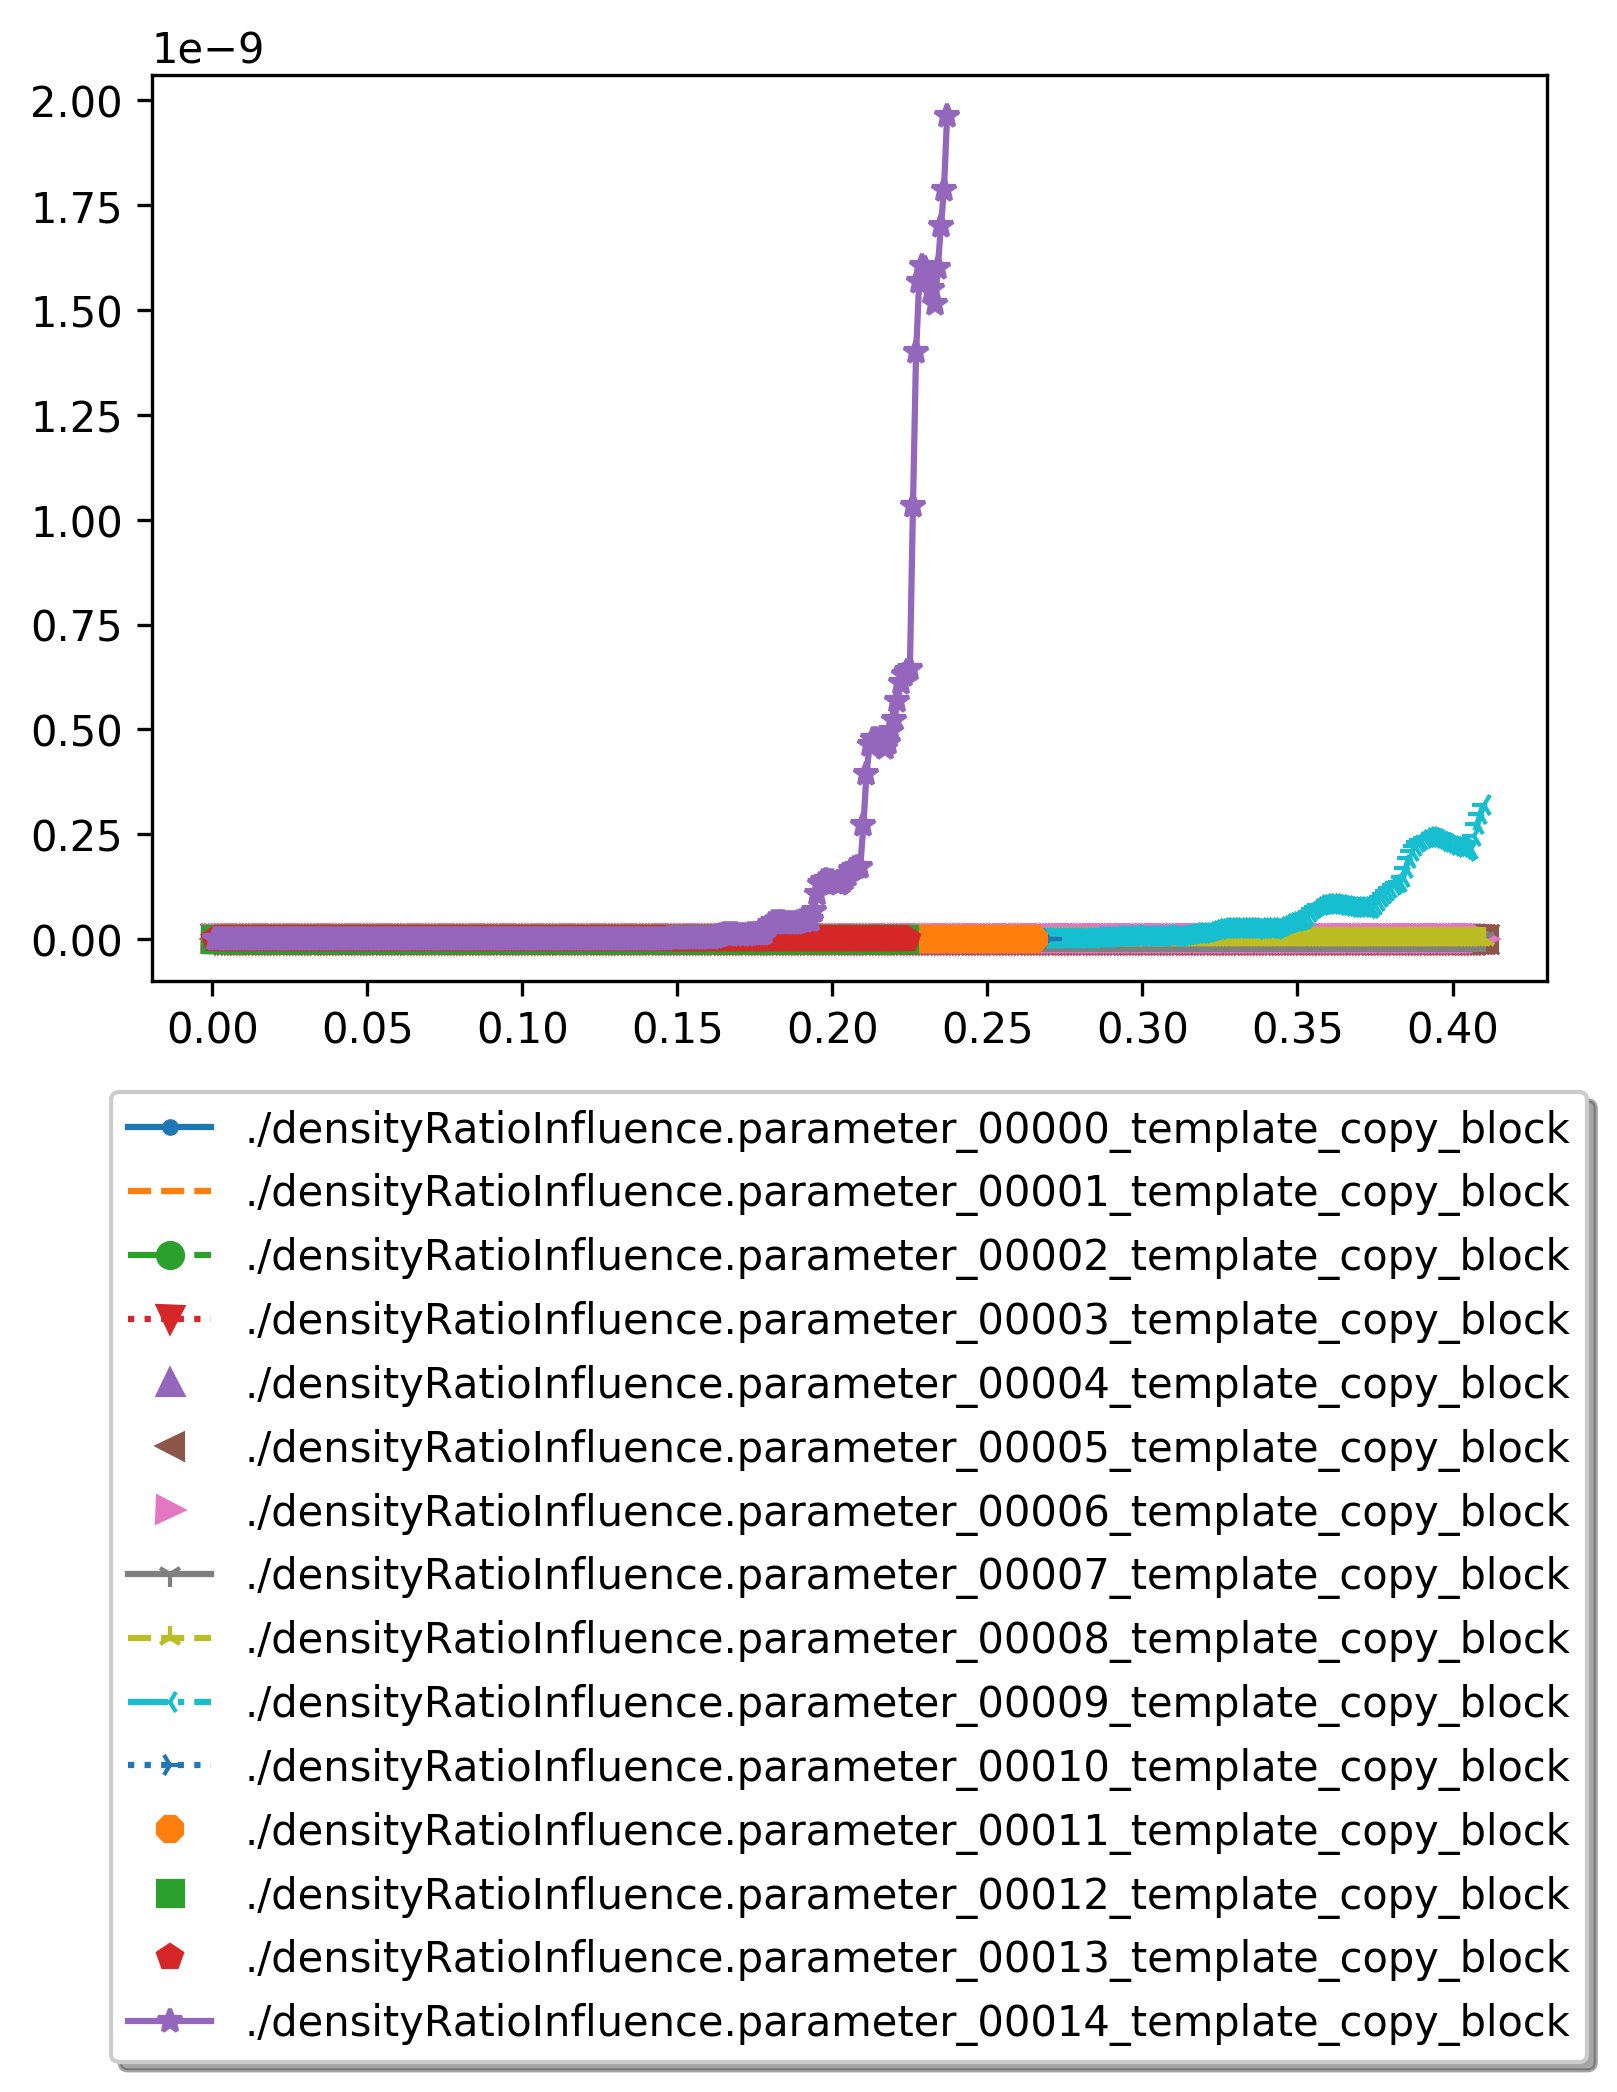

MultiIndex([(16,     1,   0),
            (16,     1,   1),
            (16,     1,   2),
            (16,     1,   3),
            (16,     1,   4),
            (16,     1,   5),
            (16,     1,   6),
            (16,     1,   7),
            (16,     1,   8),
            (16,     1,   9),
            ...
            (64, 10000, 227),
            (64, 10000, 228),
            (64, 10000, 229),
            (64, 10000, 230),
            (64, 10000, 231),
            (64, 10000, 232),
            (64, 10000, 233),
            (64, 10000, 234),
            (64, 10000, 235),
            (64, 10000, 236)],
           names=['resolution', 'rho_droplet', 'step'], length=4954)

In [10]:
plot(xColName="time", yColName="Linf velocity error", 
     studyPattern="densityRatioInfluence.parameter_00",
     parentDir=os.curdir)




MultiIndex([(16,     1,   0),
            (16,     1,   1),
            (16,     1,   2),
            (16,     1,   3),
            (16,     1,   4),
            (16,     1,   5),
            (16,     1,   6),
            (16,     1,   7),
            (16,     1,   8),
            (16,     1,   9),
            ...
            (64, 10000, 227),
            (64, 10000, 228),
            (64, 10000, 229),
            (64, 10000, 230),
            (64, 10000, 231),
            (64, 10000, 232),
            (64, 10000, 233),
            (64, 10000, 234),
            (64, 10000, 235),
            (64, 10000, 236)],
           names=['resolution', 'rho_droplet', 'step'], length=4954)

# Translating droplet case with viscosity and surface tension

Popinet, Stéphane., "An accurate adaptive solver for surface-tension-driven
interfacial flows.", Journal of Computational Physics 228.16 (2009): 5838-5866.                                                                                                                            

Abadie, Thomas, Joelle Aubin, and Dominique Legendre, "On the combined effects
of surface tension force calculation and interface advection on spurious
currents within Volume of Fluid and Level Set frameworks." Journal of
Computational Physics 297 (2015): 611-636.           

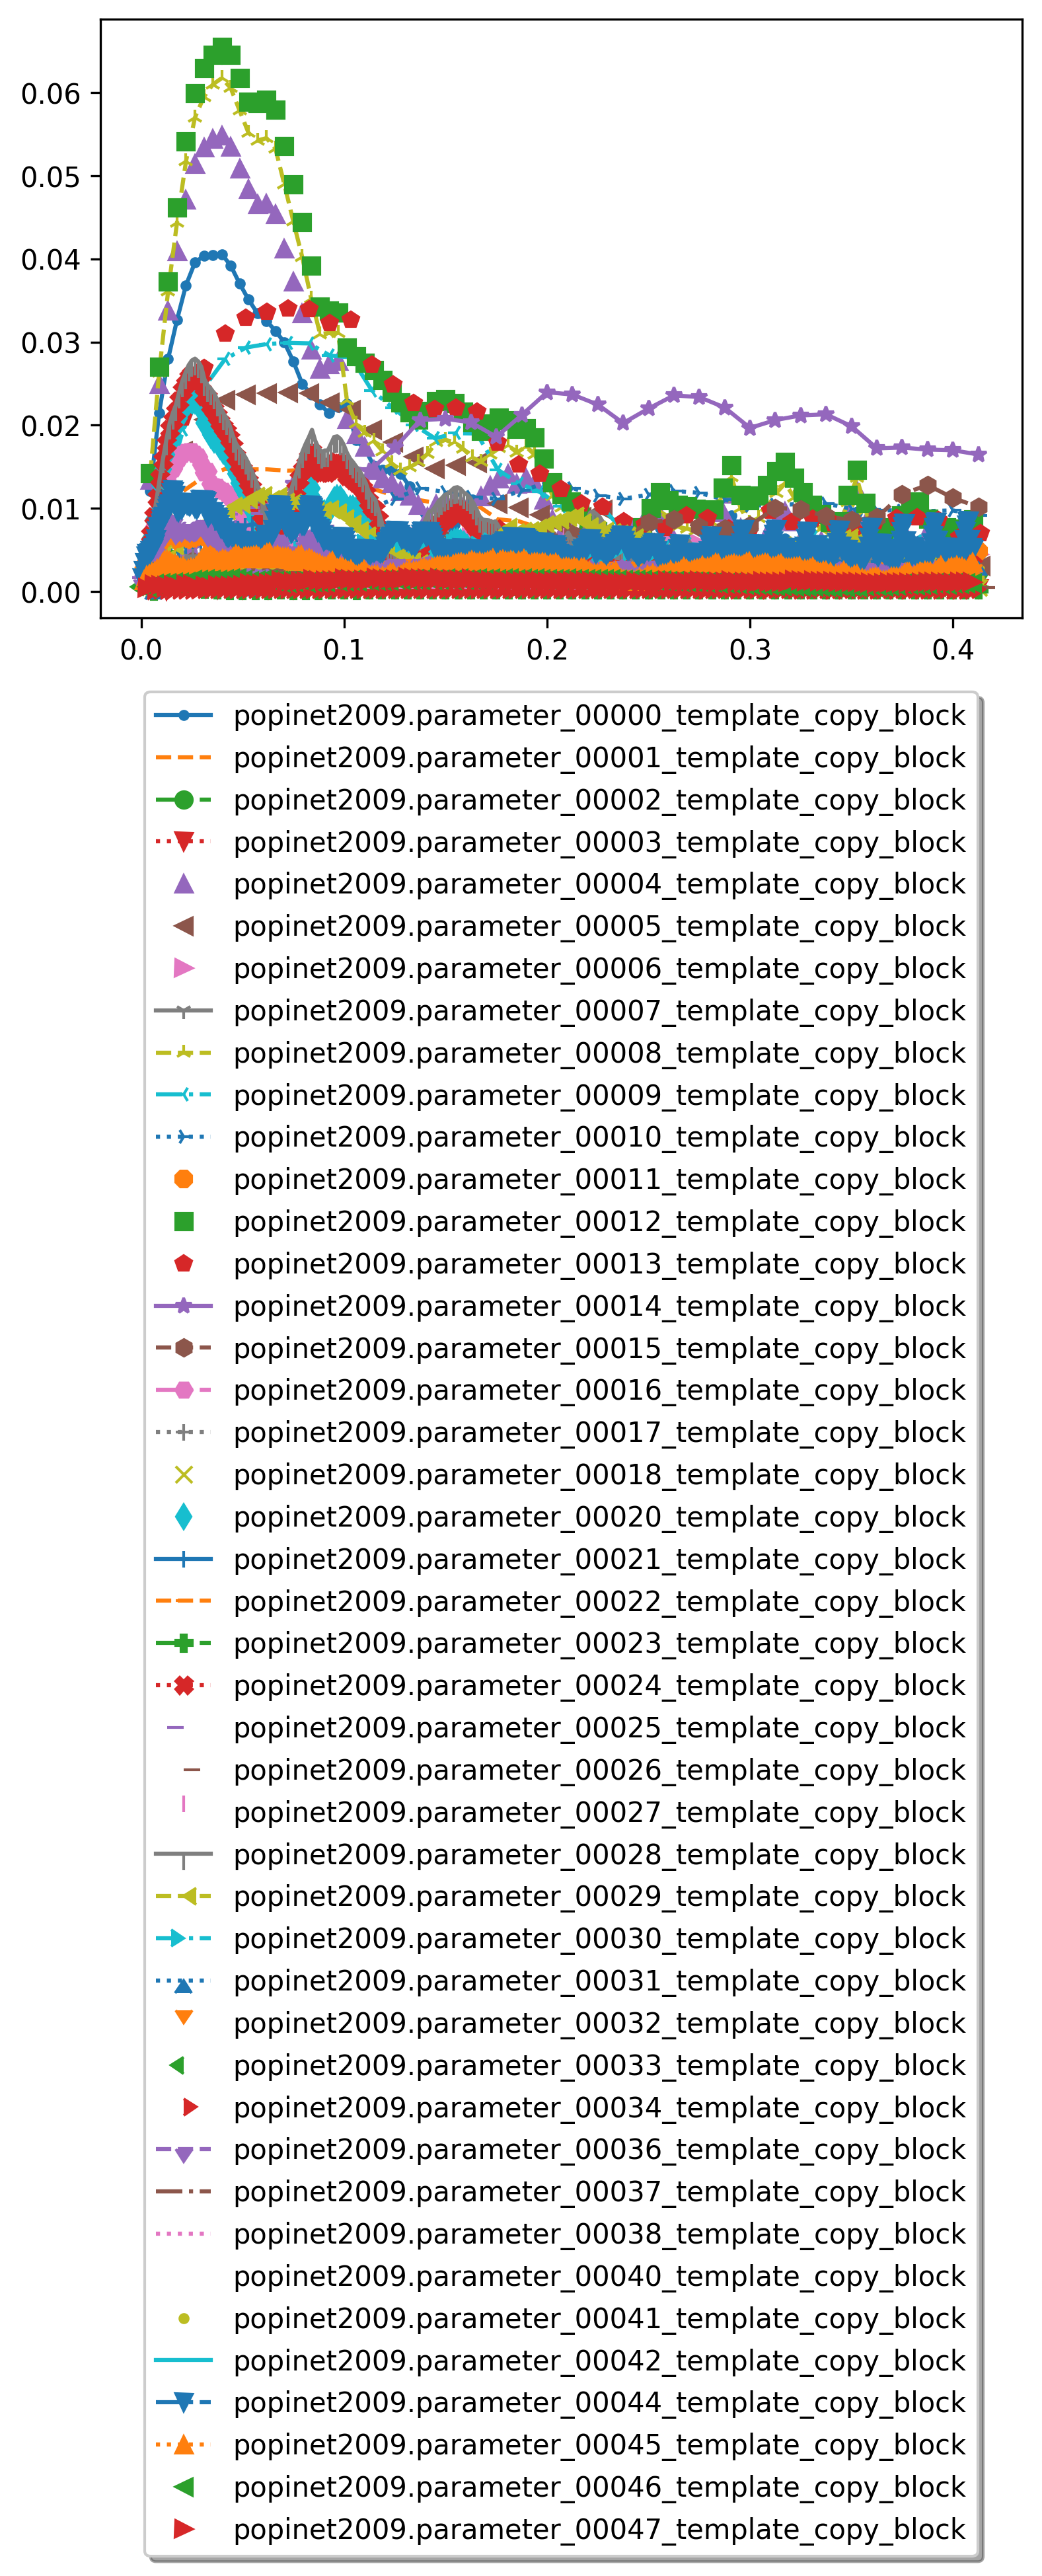

In [102]:
plot(xColName="time", yColName="Linf velocity error", 
     studyPattern="popinet2009.parameter_00", 
     error_filter = lambda error : max(error) < 0.1)